In [7]:
import librosa 

In [8]:
import soundfile
import numpy as np

In [69]:
def concatenate_segments(x, onset_samples, pad_duration=0.500):
    """Concatenate segments into one signal."""
    silence = np.zeros(int(pad_duration*sr)) # silence
    frame_sz = 10000 if len(np.diff(onset_samples)) == 0 else min(np.diff(onset_samples))   # every segment has uniform frame size
    frame_sz = 10000 if frame_sz > 10000 else frame_sz
    #print("fz"+str(frame_sz))
    return np.concatenate([
        np.concatenate([x[i:i+frame_sz], silence]) # pad segment with silence
        for i in onset_samples
    ])

In [140]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = None

/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_1365/2860673941.py:13: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['image.interpolation'] = None


In [384]:
y, sr = librosa.load('/Users/cooky/HDD/Drum/ACID WAV VINYL BREAKS/5-Oldies big (107)/OLBK023.WAV')
yt = librosa.util.normalize(y)
yt, index = librosa.effects.trim(y=yt, top_db=10)

In [385]:
DEFAULT_SR = 22050
SEED = 41
hop_length = 256

# onset_envelope = librosa.onset.onset_strength(y=yt, sr=sr, hop_length=hop_length)
# onset_frames = librosa.util.peak_pick(onset_envelope, 50, 50, 50, 50, 1, 3)
# onset_samples = librosa.frames_to_samples(onset_frames, hop_length=hop_length)

In [386]:
# onset_samples

In [387]:
# ytt = concatenate_segments(yt, onset_samples, 0)

In [388]:
# import scipy.io.wavfile
# scipy.io.wavfile.write("karplus.wav", DEFAULT_SR, yt)

In [389]:
import librosa.display

/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_1365/3794079410.py:2: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(yt, sr)


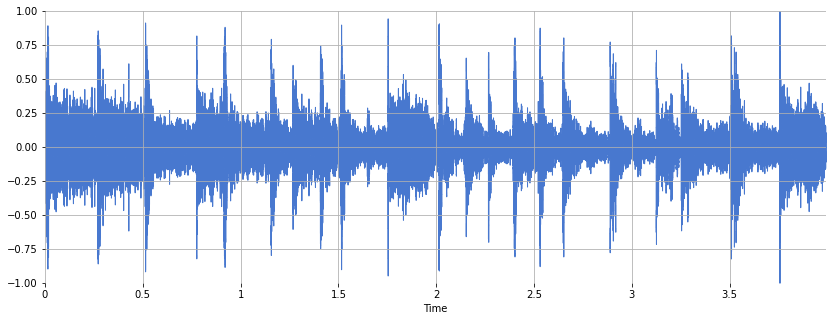

In [390]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(yt, sr)

In [443]:
S = librosa.stft(yt)
logS = librosa.amplitude_to_db(abs(S))

imsi_onset_frames = librosa.onset.onset_detect(yt, sr=sr
            , pre_max=2, post_max=5
            , pre_avg=2, post_avg=5
            , delta=0.1
            , wait=4
            )
onset_times = librosa.frames_to_time(imsi_onset_frames)

/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_1365/3176575328.py:4: FutureWarning: Pass y=[ 0.00065853  0.00816614  0.01771322 ... -0.0056617   0.02098302
  0.01731035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  imsi_onset_frames = librosa.onset.onset_detect(yt, sr=sr


In [444]:
onset_times

array([0.06965986, 0.30185941, 0.53405896, 0.81269841, 0.95201814,
       1.18421769, 1.30031746, 1.43963719, 1.55573696, 1.78793651,
       2.04335601, 2.18267574, 2.29877551, 2.43809524, 2.55419501,
       2.69351474, 2.80961451, 2.92571429, 3.15791383, 3.29723356,
       3.55265306, 3.78485261])

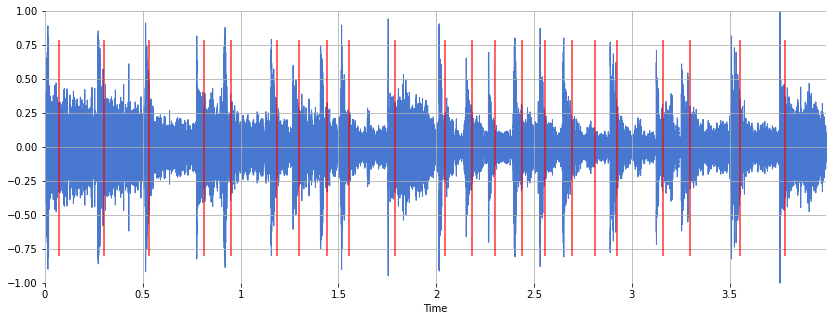

In [445]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(yt, sr=sr)
plt.vlines(onset_times, -0.8, 0.79, color='r', alpha=0.8) 

In [488]:
clicks = librosa.clicks(frames=imsi_onset_frames, sr=sr, length=len(yt))

In [490]:
tmp = len(yt)
clicks = clicks[:tmp]

In [492]:
yt.shape

(88064,)

In [477]:
y.shape == clicks.shape

False

In [493]:
zz = np.asfortranarray(np.array([yt, clicks]))

0.97391975

In [505]:
import soundfile as sf

sf.write("par.flac", zz, 44100, format='flac', subtype='PCM_24')

RuntimeError: Error opening 'par.flac': Format not recognised.

---

In [66]:
n_fft = 1024
hop_length = int(librosa.time_to_samples(1./200, sr=sr))
lag = 2
n_mels = 138
fmin = 27.5
fmax = 16000.
max_size = 3

In [67]:
odf_default = librosa.onset.onset_strength(y=yt, sr=sr)#, hop_length=hop_length)
onset_default = librosa.onset.onset_detect(y=yt, sr=sr, #hop_length=hop_length,
                                           units='time')

In [42]:
odf_sf = librosa.onset.onset_strength(S=librosa.power_to_db(S, ref=np.max),
                                      sr=sr,
                                      #hop_length=hop_length,
                                      #lag=lag, max_size=max_size)
)

/Users/cooky/miniforge3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  return f(*args, **kwargs)


In [43]:
onset_sf = librosa.onset.onset_detect(onset_envelope=odf_sf,
                                      sr=sr,
                                      #hop_length=hop_length,
                                      units='time')

In [44]:
onset_sf

array([0.60371882, 0.78947846, 0.90557823, 1.04489796, 1.16099773,
       1.32353741, 1.43963719, 1.62539683, 1.71827664, 1.88081633,
       1.9969161 , 2.15945578, 2.2523356 , 2.43809524, 2.55419501,
       2.71673469, 2.83283447, 3.0185941 , 3.13469388, 3.29723356,
       3.41333333, 3.57587302, 3.69197279, 3.85451247, 3.97061224,
       4.15637188, 4.2492517 , 4.43501134, 4.52789116, 4.69043084,
       4.82975057, 4.99229025, 5.10839002, 5.29414966, 5.41024943,
       5.54956916, 5.66566893, 5.82820862, 5.94430839, 6.13006803,
       6.22294785, 6.40870748, 6.52480726, 6.68734694, 6.78022676,
       6.96598639, 7.08208617, 7.24462585, 7.36072562, 7.52326531,
       7.66258503, 7.80190476, 7.94122449, 8.10376417, 8.2430839 ,
       8.35918367, 8.4985034 , 8.77714286, 8.93968254])

In [48]:
sf_clicks = librosa.clicks(frames=librosa.time_to_frames(onset_sf), sr=sr, length=len(yt))

In [49]:
zz = yt + sf_clicks

In [50]:
scipy.io.wavfile.write("sur.wav", DEFAULT_SR, zz)